# 1. Importation & Exploration
## 1.1 Importation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

## 1.2 Exploration

In [3]:
df = pd.read_csv("latence_reseau.csv", sep=(";"))

In [4]:
df.head()

,Bande_passante_Mbps,Distance_km,Taux_utilisation_%,Nombre_sauts,Type_lien,Latence_ms
0,10,2,30,2,0,18
1,20,5,40,3,0,25
2,50,10,60,4,0,40
3,100,15,70,5,0,55
4,100,5,30,2,1,12


In [5]:
df.describe()

,Bande_passante_Mbps,Distance_km,Taux_utilisation_%,Nombre_sauts,Type_lien,Latence_ms
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,91.176471,12.352941,54.705882,3.705882,0.823529,34.647059
std,79.599180,8.992644,23.549853,1.794600,0.808957,18.272046
min,10.000000,1.000000,10.000000,1.000000,0.000000,9.000000
25%,30.000000,5.000000,40.000000,2.000000,0.000000,18.000000
50%,60.000000,10.000000,60.000000,4.000000,1.000000,32.000000
75%,100.000000,20.000000,70.000000,5.000000,1.000000,48.000000
max,300.000000,30.000000,90.000000,7.000000,2.000000,68.000000


In [6]:
df.isnull().sum()

Bande_passante_Mbps    0
Distance_km            0
Taux_utilisation_%     0
Nombre_sauts           0
Type_lien              0
Latence_ms             0
dtype: int64

# 2. Analyse & Visualisation
## 2.1 Tracer au-moins trois graphiques


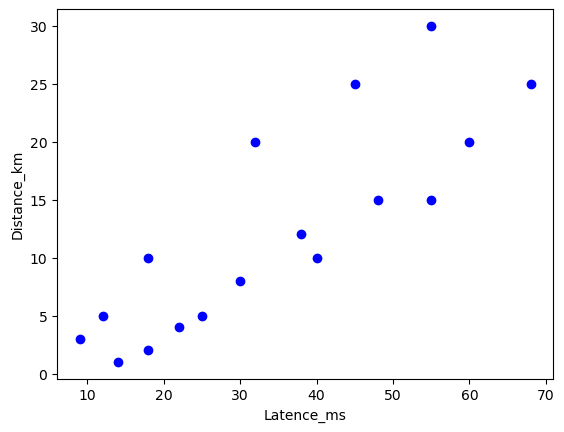

In [8]:
L = plt.xlabel("Latence_ms")
D = plt.ylabel("Distance_km")
plt.scatter(df["Latence_ms"],df["Distance_km"], color = "blue")

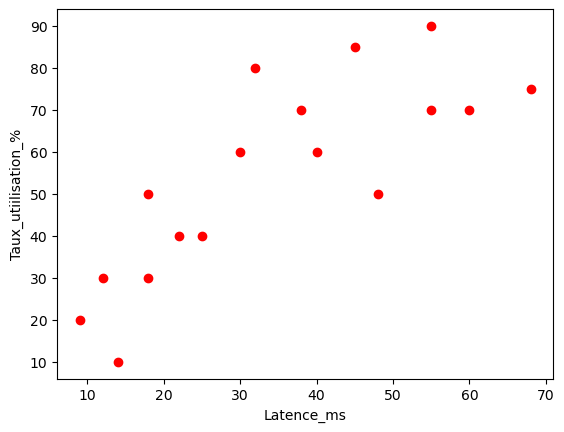

In [9]:
L = plt.xlabel("Latence_ms")
T = plt.ylabel("Taux_utiilisation_%")
plt.scatter(df["Latence_ms"],df["Taux_utilisation_%"], color = "red")

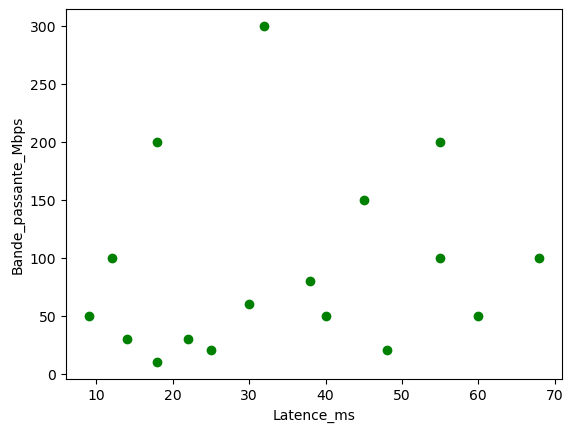

In [10]:
L = plt.xlabel("Latence_ms")
B = plt.ylabel("Bande_passante_Mbps")
plt.scatter(df["Latence_ms"],df["Bande_passante_Mbps"], color = "green")

## 2.2 Ajouter une interpretation écrite

### A) La variable qui semble la plus corrélee avec la latence est le Taux d'uitilisation exprimé en %, visuellement parlant
### B) Certes, la fibre optique a un impact positif dans ce modèle, justement elle permet un passage rapide des données en rapport avec la latence (le temps que met le paquet ), c'est un facteur qui influence la latence, lorsqu'on voit la variable Type_lien, c'est une variable explicative (feature catégorielle)... dans le cas de ce modèle, la fibre optique permet un transfert proche de la vitesse de la lumière, peu de bruit donc moins de délai  

# 3. Préparation du modèle

## 3.1 Définition des features X

In [12]:
x = df[['Bande_passante_Mbps','Distance_km','Taux_utilisation_%','Nombre_sauts','Type_lien']]

## 3.2 Définiton de la cible

In [13]:
y = df['Latence_ms']

## 3.3 division en train/test

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

# 4. Utilisation de la Régression Lineaire

## 4.1 LinearRegression


In [15]:
lr = linear_model.LinearRegression()
lr

LinearRegression()

# 4.2 entrainement

In [16]:
lr.fit(x_train, y_train)

LinearRegression()

## 4.3 test

In [17]:
data = lr.predict(x_test)

In [18]:
data

array([28.73747075, 38.88804318, 17.39413572, 53.98873531])

# 5. Évaluation

### 5.1 Calcul des metrics

## NB : 
#### Je ne calcule pas les metrics sur les mêmes données qu'il utilisait d'apprendre, c'est pourquoi j'ai ajouté la librairie train_test_split

### 5.1.1 r2_score

In [19]:
print("r2_score :", (y_test, data))

r2_score : (0     18
1     25
5     18
15    60
Name: Latence_ms, dtype: int64, array([28.73747075, 38.88804318, 17.39413572, 53.98873531]))


### 5.1.2 root_main_squared_error()

In [20]:
print("Le RMSE est : " , root_mean_squared_error(y_test, data))

Le RMSE est :  9.282690829894454


### 5.1.3 mean_absolute_error()

In [21]:
print("Le MAE est : ",mean_absolute_error(y_test,data))

Le MAE est :  7.810660723119919


## Interpretation des resultats
### A) Pas très précis, par  ce que le RMSE et le MAE s'éloigne un peu plus de zéro... Par contre le r2_score est un peu proche de zéro donc passable car il n'exploite pas les 100%
### B) Logiquement nous savons qu'à chaque entrée correspond à une sortie, donc faut améliorer les données que le modèle a utilisé pour apprendre

## 

# Bonus : nouvelle prédiction

In [86]:
nouvellePrediction = [[45,7,55,3,1]]

In [87]:
prediction = lr.predict(nouvellePrediction)

C:\Users\TONYKEMS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [90]:
print("La latence est de :",prediction)

La latence est de : [32.39682364]
